# ANALISIS SENTIMEN TERHADAP KEBIJAKAN FULL DAY SCHOOL DENGAN METODE SUPPORT VECTOR MACHINE (SVM)
Aplikasi ini menggunakan methode SVM. ada pun library yang harus digunakan antara lainnya :  
1. Install pandas: pip install pandas
2. Install numpy: pip install numpy
3. Install matplotlib: pip install matplotlib
4. Install openpyxl: pip install openpyxl
5. Install string: pip install string
6. Install re: pip install re
7. Install nltk: pip install nltk
8. Install swifter: pip install swifter
9. Install deep_translator: pip install deep-translator


In [691]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import openpyxl
import string
import re #regex library
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from bs4 import BeautifulSoup
import nltk
import swifter
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import svm
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from deep_translator import GoogleTranslator
import time

MENYIAPKAN DATA LATIH : Mengambil data latih yang sudah disiapkan dalam bentuk Excel.

In [692]:
data = pd.read_excel('assets/data_latih.xlsx')
df=pd.DataFrame(data[['tweet']])
df

,tweet
0,ke 24 tayang yang ane baru liat IG soalny wkwk
1,tau ah like ke berapa yg pentik like koment n ...
2,nggak lahh gw nanti gw jadi malas<br>sekarang ...
3,kalo gua ma biasa aja kan sekolah gw emang sek...
4,jadi capek<br>harus bawa makanan banyak atau uang
...,...
3994,Gk setuju gw ngerasain sendiri<br>-banyaj PR<b...
3995,Mungkin banget. Gw aja udh cape sekolah masih ...
3996,"Halo Haikal, saya dari masa depan tepatnya tah..."
3997,Saya sampai demam karena lamanya sekolah dan p...


CASE FOLDING: Melakukan case folding dari hasil tweet, dimana case folding mengubah semua huruf menjadi lowercase (huruf Kecil).

In [693]:

df['case folding'] = df['tweet'].str.lower()
df

,tweet,case folding
0,ke 24 tayang yang ane baru liat IG soalny wkwk,ke 24 tayang yang ane baru liat ig soalny wkwk
1,tau ah like ke berapa yg pentik like koment n ...,tau ah like ke berapa yg pentik like koment n ...
2,nggak lahh gw nanti gw jadi malas<br>sekarang ...,nggak lahh gw nanti gw jadi malas<br>sekarang ...
3,kalo gua ma biasa aja kan sekolah gw emang sek...,kalo gua ma biasa aja kan sekolah gw emang sek...
4,jadi capek<br>harus bawa makanan banyak atau uang,jadi capek<br>harus bawa makanan banyak atau uang
...,...,...
3994,Gk setuju gw ngerasain sendiri<br>-banyaj PR<b...,gk setuju gw ngerasain sendiri<br>-banyaj pr<b...
3995,Mungkin banget. Gw aja udh cape sekolah masih ...,mungkin banget. gw aja udh cape sekolah masih ...
3996,"Halo Haikal, saya dari masa depan tepatnya tah...","halo haikal, saya dari masa depan tepatnya tah..."
3997,Saya sampai demam karena lamanya sekolah dan p...,saya sampai demam karena lamanya sekolah dan p...


CLEANING DATA
1. Menghapus semua tanda baca dan karakter yang bukan huruf.
2. Menghapus angka yang mungkin merupakan kata-kata yang penting.
3. Menghapus whitespace yang ada di awal dan akhir tweet.
4. Menghapus whitespace yang ada di antara kata.
5. Menghapus kata-kata yang kata sendiri.

In [694]:
import re

def remove_tweet_special(text):
    # Mengcheck bahwa data merupakan string
    if not isinstance(text, str):
        return ""  # Jika bukan string, akan kembalikan data kosong
    
    # Menghilangkan tab, line baru, and backslash karakter
    text = text.replace('\t', " ").replace('\n', " ").replace('\\', " ")

    # Menghilangkan non-ASCII characters (emoticons, Chinese characters, etc.)
    text = text.encode('ascii', 'replace').decode('ascii')

    # Menghilangkan mentions, links, and hashtags
    text = re.sub(r'[@#][A-Za-z0-9]+|https?://\S+', " ", text)

    # Menghilangkan extra whitespace
    text = ' '.join(text.split())

    return text

# Fungsi untuk menghapus tag HTML
def remove_html_tags(text):
    # Ganti <br> dengan spasi
    text = text.replace("<br>", " ").replace("<br/>", " ").replace("<p>", " ").replace("</p>", " ")
    # Hapus tag HTML lainnya
    soup = BeautifulSoup(text, "html.parser")
    clean_text = soup.get_text()
    # Ganti spasi berlebih dengan satu spasi
    clean_text = ' '.join(clean_text.split())
    return clean_text

def remove_number(text):
    return  re.sub(r"\d+", "", text)

#Menghilangkan  punctuation
def remove_punctuation(text):
    return text.translate(str.maketrans("","",string.punctuation))

#Menghilangkan whitespace leading & trailing
def remove_whitespace_LT(text):
    return text.strip()

#Menghilangkan kelebihan whitespace into single whitespace
def remove_whitespace_multiple(text):
    return re.sub('\s+',' ',text)

def remove_single_char(text):
    return re.sub(r"\b[a-zA-Z]\b", "", text)

df['data cleansing'] = df['case folding'].apply(remove_html_tags)

df['data cleansing'] = df['data cleansing'].apply(remove_tweet_special)

df['data cleansing'] = df['data cleansing'].apply(remove_number)

df['data cleansing'] = df['data cleansing'].apply(remove_punctuation)

df['data cleansing'] = df['data cleansing'].apply(remove_whitespace_LT)

df['data cleansing'] = df['data cleansing'].apply(remove_whitespace_multiple)

df['data cleansing'] = df['data cleansing'].apply(remove_single_char)

df.head()


C:\Users\adiyo\AppData\Local\Temp\ipykernel_17808\2709431794.py:27: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")


,tweet,case folding,data cleansing
0,ke 24 tayang yang ane baru liat IG soalny wkwk,ke 24 tayang yang ane baru liat ig soalny wkwk,ke tayang yang ane baru liat ig soalny wkwk
1,tau ah like ke berapa yg pentik like koment n ...,tau ah like ke berapa yg pentik like koment n ...,tau ah like ke berapa yg pentik like koment s...
2,nggak lahh gw nanti gw jadi malas<br>sekarang ...,nggak lahh gw nanti gw jadi malas<br>sekarang ...,nggak lahh gw nanti gw jadi malas sekarang gw ...
3,kalo gua ma biasa aja kan sekolah gw emang sek...,kalo gua ma biasa aja kan sekolah gw emang sek...,kalo gua ma biasa aja kan sekolah gw emang sek...
4,jadi capek<br>harus bawa makanan banyak atau uang,jadi capek<br>harus bawa makanan banyak atau uang,jadi capek harus bawa makanan banyak atau uang



Tokenization : 
Melakukan tokenisasi kata-kata pada data yang sudah dibersihkan.

In [695]:
# Mengunduh  NLTK data untuk tokenization
nltk.download('punkt')

def tokenization(text):
  return word_tokenize(text)

df['tokenization'] = df['data cleansing'].apply(tokenization)
df.head()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\adiyo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,tweet,case folding,data cleansing,tokenization
0,ke 24 tayang yang ane baru liat IG soalny wkwk,ke 24 tayang yang ane baru liat ig soalny wkwk,ke tayang yang ane baru liat ig soalny wkwk,"[ke, tayang, yang, ane, baru, liat, ig, soalny..."
1,tau ah like ke berapa yg pentik like koment n ...,tau ah like ke berapa yg pentik like koment n ...,tau ah like ke berapa yg pentik like koment s...,"[tau, ah, like, ke, berapa, yg, pentik, like, ..."
2,nggak lahh gw nanti gw jadi malas<br>sekarang ...,nggak lahh gw nanti gw jadi malas<br>sekarang ...,nggak lahh gw nanti gw jadi malas sekarang gw ...,"[nggak, lahh, gw, nanti, gw, jadi, malas, seka..."
3,kalo gua ma biasa aja kan sekolah gw emang sek...,kalo gua ma biasa aja kan sekolah gw emang sek...,kalo gua ma biasa aja kan sekolah gw emang sek...,"[kalo, gua, ma, biasa, aja, kan, sekolah, gw, ..."
4,jadi capek<br>harus bawa makanan banyak atau uang,jadi capek<br>harus bawa makanan banyak atau uang,jadi capek harus bawa makanan banyak atau uang,"[jadi, capek, harus, bawa, makanan, banyak, at..."


Tokenization : Melakukan normalisasi kata-kata yang telah di-tokenisasi

In [696]:
normalized_word = pd.read_excel("assets/normalisasi.xlsx")

# Membuat kamus untuk normalisasi
normalized_word_dict = {}
for index, row in normalized_word.iterrows():
    normalized_word_dict[row[0]] = row[1]  

# fungsi tokenisasi
def tokenization(text):
    return word_tokenize(text)

# Fungsi normalisasi
def normalized_term(document):
    return [normalized_word_dict.get(term, term) for term in document]

df['normalized_term'] = df['tokenization'].apply(normalized_term)
df.head()

,tweet,case folding,data cleansing,tokenization,normalized_term
0,ke 24 tayang yang ane baru liat IG soalny wkwk,ke 24 tayang yang ane baru liat ig soalny wkwk,ke tayang yang ane baru liat ig soalny wkwk,"[ke, tayang, yang, ane, baru, liat, ig, soalny...","[ke, tayang, yang, ane, baru, lihat, instagram..."
1,tau ah like ke berapa yg pentik like koment n ...,tau ah like ke berapa yg pentik like koment n ...,tau ah like ke berapa yg pentik like koment s...,"[tau, ah, like, ke, berapa, yg, pentik, like, ...","[tau, ah, like, ke, berapa, yg, pentik, like, ..."
2,nggak lahh gw nanti gw jadi malas<br>sekarang ...,nggak lahh gw nanti gw jadi malas<br>sekarang ...,nggak lahh gw nanti gw jadi malas sekarang gw ...,"[nggak, lahh, gw, nanti, gw, jadi, malas, seka...","[tidak, lahh, aku, nanti, aku, jadi, malas, se..."
3,kalo gua ma biasa aja kan sekolah gw emang sek...,kalo gua ma biasa aja kan sekolah gw emang sek...,kalo gua ma biasa aja kan sekolah gw emang sek...,"[kalo, gua, ma, biasa, aja, kan, sekolah, gw, ...","[kalo, aku, sama, biasa, aja, kan, sekolah, ak..."
4,jadi capek<br>harus bawa makanan banyak atau uang,jadi capek<br>harus bawa makanan banyak atau uang,jadi capek harus bawa makanan banyak atau uang,"[jadi, capek, harus, bawa, makanan, banyak, at...","[jadi, capek, harus, bawa, makanan, banyak, at..."


Stopwords : Melakukan stopwords pada data normalisasi yang umum dipakai dalam bahasa Indonesia disebutkan dalam file stopwords.xlsx

In [697]:
import pandas as pd
from nltk.tokenize import word_tokenize
import nltk
from nltk.corpus import stopwords

# Download the necessary NLTK resources (run this once)
nltk.download('punkt')
nltk.download('stopwords')

# Menggunakan Indonesian stopwords
list_stopwords = stopwords.words('indonesian')

# Bisa menambahkan stopword yang dibutuhkan ke list stopwords
list_stopwords.extend([
    'full', 'day',
    'nik', 'ais', 'ih', 'kuea', 'ndes', 'tk', 'arg', 'hhhh', 'wuakakak',
    'gtth', 'wowww', 'apeeee', 'Aksjsjsk', 'alaee', 'koq', 'salengpraew',
    'rukkhadevata', 'zeon', 'vivienne', 'yaam', 'woyy', 'ykwi', 'auff',
    'ue', 'hoek', 'hayo', 'chnmn', 'hahahah', 'haaaaaa', 'din', 'woy',
    'ndeer', 'lalalala', 'wkwkwkwkwkkw', 'woyyy', 'dih', 'den', 'hehew',
    'etdah', 'beeeuh', 'wahh', 'heheee', 'hhaaha', 'waaaaa', 'oakilah',
    'haaaahh', 'huft', 'ai', 'et', 'acha', 'hokyahokya', 'hahahihi',
    'yl', 'wihh', 'hahahaa', 'hhhh', 'def', 'ayom', 'ser', 'duh',
    'heuheueheu', 'huwaaaaaa', 'yalah', 'mww', 'cekabia', 'dikatara',
    'angganara', 'krtsk', 'woee', 'ndi', 'ohh', 'www', 'aee', 'huaaaa',
    'gn', 'hahahah', 'nd', 'ema', 'ceratops', 'pasuk', 'ygy', 'repp',
    'gais', 'hadehhh', 'walah', 'hahah', 'paa', 'awkwkwk', 'wkwkk',
    'wkwkw', 'wkwkwkwkwkwah', 'wkwkwkw', 'baceprot', 'sksksk', 'heheh',
    'brooo', 'dbd', 'aeee', 'weeeh', 'wehh', 'milta', 'hsnah', 'swsg',
    'hemm', 'xda', 'yara', 'ohh', 'heh', 'kle', 'acy', 'hayooo',
    'hahahahaha', 'balablablabla', 'lai', 'loj', 'itine', 'heehehe',
    'kwkwk', 'kwkwkwkwwkwk', 'waaa', 'demending', 'pali', 'eeh',
    'dlsb', 'cooooy', 'hehehehe', 'adjem', 'aih', 'syar', 'wkwkk',
    'aowkwkwk', 'walah', 'euy', 'der', 'hahaa', 'hesteg', 'hmmmmtar',
    'gtideologi', 'ab', 'owkwkwkwk', 'dncw', 'sloga', 'jo', 'jengjenggg',
    'anuanu', 'caw', 'ehehheheh', 'hlaa', 'hahahihi', 'ckckckck',
    'sich', 'pakin', 'mmarkpkk', 'ponponpon', 'kyary', 'pamyu',
    'laaahhh', 'cp', 'duhhh', 'napen', 'lise', 'bi', 'ieu', 'poho',
    'boga', 'imah', 'keur', 'ulin', 'kwkwkw', 'ehheh', 'gryli',
    'oalah', 'prekk', 'hehh', 'cere', 'ekekekek', 'chco', 'nganu',
    'wkwkkwkwkwkwkw', 'pfft', 'awowkwkwkwk', 'kinyis', 'pus', 'yng',
    'yg', 'yang', 'wkwoswkwo', 'wkwkwkwkwkwk', 'ahahha', 'weeeeh',
    'hah', 'fir', 'hong', 'jay', 'haikyuu', 'nderrr',
    'omtanteuwaksodara', 'ahsajkakaka', 'kwkwkwk', 'derrr',
    'wwkwkwkw', 'hadehh', 'aaaaa', 'heeh', 'dem', 'ocaaa',
    'wo', 'prenup', 'dihhh', 'cokk', 'imho', 'chenle',
    'jsdieksisnisawikwok', 'hahahahahahaha', 'bam', 'yowohh',
    'lau', 'boiiiii', 'gih', 'beuhhh', 'wkw', 'wkwkwkw',
    'dooong', 'oalaaaa', 'sinoeng', 'wkekwk', 'nyai',
    'cai', 'anw', 'tjuyyy', 'hanss', 'mh', 'ih',
    'widihh', 'cy', 'eeeee', 'gi', 'luat', 'laaaaa',
    'cam', 'lancau', 'tuch', 'kun', 'uhhhh', 'chuakssss',
    'oiyaa', 'hadeuhhhh', 'wkwkwkwwk', 'hehehee', 'nk',
    'lak', 'qwq', 'oneesan', 'eeehmmm', 'am', 'wkwk'
])

# Mengisi data manual stopwords ke excel
txt_stopword = pd.read_csv("assets/stopwordbahasa.txt", names=["stopwords"], header=None)
list_stopwords.extend(txt_stopword["stopwords"])

# Mengconvert data stopword
list_stopwords = set(list_stopwords)

# Fungsi untuk menghilangkan stopwords
def stopwords_removal(words):
    return [word for word in words if word not in list_stopwords]

df['stopwords'] = df['normalized_term'].apply(stopwords_removal)
df.head()


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\adiyo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\adiyo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,tweet,case folding,data cleansing,tokenization,normalized_term,stopwords
0,ke 24 tayang yang ane baru liat IG soalny wkwk,ke 24 tayang yang ane baru liat ig soalny wkwk,ke tayang yang ane baru liat ig soalny wkwk,"[ke, tayang, yang, ane, baru, liat, ig, soalny...","[ke, tayang, yang, ane, baru, lihat, instagram...","[tayang, ane, lihat, instagram, soalny]"
1,tau ah like ke berapa yg pentik like koment n ...,tau ah like ke berapa yg pentik like koment n ...,tau ah like ke berapa yg pentik like koment s...,"[tau, ah, like, ke, berapa, yg, pentik, like, ...","[tau, ah, like, ke, berapa, yg, pentik, like, ...","[tau, ah, like, pentik, like, koment, subscribe]"
2,nggak lahh gw nanti gw jadi malas<br>sekarang ...,nggak lahh gw nanti gw jadi malas<br>sekarang ...,nggak lahh gw nanti gw jadi malas sekarang gw ...,"[nggak, lahh, gw, nanti, gw, jadi, malas, seka...","[tidak, lahh, aku, nanti, aku, jadi, malas, se...","[lahh, malas, aja]"
3,kalo gua ma biasa aja kan sekolah gw emang sek...,kalo gua ma biasa aja kan sekolah gw emang sek...,kalo gua ma biasa aja kan sekolah gw emang sek...,"[kalo, gua, ma, biasa, aja, kan, sekolah, gw, ...","[kalo, aku, sama, biasa, aja, kan, sekolah, ak...","[kalo, aja, sekolah, sekolah]"
4,jadi capek<br>harus bawa makanan banyak atau uang,jadi capek<br>harus bawa makanan banyak atau uang,jadi capek harus bawa makanan banyak atau uang,"[jadi, capek, harus, bawa, makanan, banyak, at...","[jadi, capek, harus, bawa, makanan, banyak, at...","[capek, bawa, makanan, uang]"


Stemming : Melakukan stemming pada data stopwords yang umum dipakai dalam bahasa Indonesia menggunakan library Sastrawi

In [698]:

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from collections import Counter

# Membuat stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stemmed_wrapper(term):
    if term == 'tuju':
        return 'setuju'
    else:
        return stemmer.stem(term)

# Membuat ketentuan dari stemming
term_dict = {}
for document in df['normalized_term']:
    for term in document:
        if term not in term_dict:
            term_dict[term] = stemmed_wrapper(term)

# Menggunakan stemming
def get_stemmed_term(document):
    return [term_dict[term] for term in document]

df['stemmed'] = df['stopwords'].swifter.apply(get_stemmed_term)


def fit_stopwords(text):
    text= np.array(text)
    text= ' '.join(text)
    return text

df['text']=df['stemmed'].apply(lambda x: fit_stopwords(x))
df.to_excel("output/bahasa.xlsx", index=False)
df

Translation : Textblob memwajibkan untuk melakukan analisis sentiment pada teks menggunakan bahasa Inggris

In [ ]:
    
# Menerjemahkan text dari Indonesian ke English
import concurrent.futures

# Fungsi untuk menerjemahkan teks
def translate_text(text):
    try:
        return GoogleTranslator(source='id', target='en').translate(text)
    except Exception as e:
        print(f"Error translating text: {e}")
        return text

# Membaca file Excel
data = pd.read_excel('output/english.xlsx')

# Membuat DataFrame
df = pd.DataFrame(data[['text', 'english']])

# Menghapus baris yang memiliki nilai NaN di kolom 'text'
df = df.dropna(subset=['text'])

# Mengonversi nilai kolom 'text' menjadi string (jika belum)
df['text'] = df['text'].astype(str)

# Menerjemahkan teks secara paralel
with concurrent.futures.ThreadPoolExecutor() as executor:
    translated_texts = list(executor.map(translate_text, df['text']))

# Menambahkan teks yang telah diterjemahkan ke DataFrame
df['english'] = translated_texts

# Menyimpan hasil ke dalam file Excel
df.to_excel("output/english.xlsx", index=False)

df.head()


# //Belihan kedua 
# translated_texts = []
# for text in df['text']:
#     translated_text =  translated = GoogleTranslator(source='id', target='en').translate(text)
#     translated_texts.append(translated_text)
#     time.sleep(1)  # Add a delay to avoid overloading the translation service

# df['english'] = translated_texts
# df.to_excel("output/english.xlsx", index=False)


# df.head()

,text,english
0,full day aja maju aduh,let's go full day ouch
1,demam sekolah ajar,school fever
2,halo haikal tepat sekolah rumah wabah virus tular,hello haikal right home school contagious viru...
3,nonton anime tai,watch anime tai
4,full day,full day


In [ ]:
# menyiapkan VADER untuk sentiment analysis

from sklearn.feature_extraction.text import TfidfVectorizer
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

# looping untuk menerjemahkan kalimat ke bahasa inggris, karena library textblob hanya support bahasa inggris
# sekaligus kita melakukan sentiment analysis, dan menyimpan hasilnya ke dalam field Sentimen & Label
for index, row in data.iterrows():
    try:
        # terjemahkan kalimat ke bahasa inggris
        translated = GoogleTranslator(source='id', target='en').translate(row['Komentar'])

        # hitung sentiment menggunakan textblob
        # blob = TextBlob(translated)

        # hitung sentiment menggunakan nltk
        vader = sia.polarity_scores(translated)

        # ambil nilai sentiment
        # sentiment = blob.sentiment.polarity
        sentiment = vader['compound']

        # tambahkan sentiment ke dataframe
        data.at[index, 'Sentimen'] = sentiment
        data.at[index, 'Translated'] = translated

        # tambahkan label ke dataframe
        if sentiment > 0:
            data.at[index, 'Label'] = 'Positif'
        elif sentiment < 0:
            data.at[index, 'Label'] = 'Negatif'
        else:
            data.at[index, 'Label'] = 'Netral'

        print('Processing data:', index, 'of', len(data), '(', sentiment, ')', translated)
    except Exception as e:
        data.at[index, 'Sentimen'] = 0
        data.at[index, 'Label'] = 'Netral'

        print('Error processing data at index', index, ':', e)



TextBlob : TextBlob merupakan library Python yang didesain untuk melakukan analisis

In [ ]:
import pandas as pd
from textblob import TextBlob
def analysis(score):
    if score > 0:
        return 'positif'
    elif score == 0:
        return 'netral'
    else:
        return 'negatif'
# Read the Excel file
data = pd.read_excel('output/english.xlsx')

# Create a DataFrame
df = pd.DataFrame(data[['text', 'english']])

# Drop rows with NaN values in 'english' column
df = df.dropna(subset=['english'])

# Convert 'english' column values to string (in case they are not already)
df['english'] = df['english'].astype(str)

# Perform sentiment analysis
df['polarity'] = df['english'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['score'] = df['polarity'].apply(analysis)

# Save the results to Excel
df.to_excel("output/textblob.xlsx", index=False)
df

,text,english,polarity,score
0,full day aja maju aduh,let's go full day ouch,0.350000,positif
1,demam sekolah ajar,school fever,0.000000,netral
2,halo haikal tepat sekolah rumah wabah virus tular,hello haikal right home school contagious viru...,0.285714,positif
3,nonton anime tai,watch anime tai,0.000000,netral
4,full day,full day,0.350000,positif
...,...,...,...,...
572,sekolah full day,full day school,0.350000,positif
573,fasilitas sekolah spp aja pakai kip fasilitas ...,school facilities only use KIP for tuition fee...,0.113636,positif
574,smk full day full day njer tuju full day bikin...,full day high school full day njer go full day...,0.142000,positif
575,toy gaming bercandavhehetapi sih ya,toy gaming just kiddingvhehebut heck yeah,0.000000,netral


Calculating Sentiment Analysis : Melakukan analisis sentiment pada data yang sudah di latih

In [ ]:

# Calculating the number of each sentiment
jumlah_negatif = sum(df['score'] == 'negatif')
jumlah_positif = sum(df['score'] == 'positif')
jumlah_netral = sum(df['score'] == 'netral')
total_data = len(df)

print("Negatif:", jumlah_negatif, ", Positif:", jumlah_positif, ", Netral:", jumlah_netral, ", Total:", total_data)

# Calculate the number of training and testing data
jumlah_data_training = int(0.8 * total_data)
jumlah_data_testing = total_data - jumlah_data_training

# Calculate the percentage of training and testing data
persentase_training = (jumlah_data_training / total_data) * 100
persentase_testing = (jumlah_data_testing / total_data) * 100

# Calculating the number of positive sentiment data used for training and testing
jumlah_positif_training = len(df[(df['score'] == 'positif') & (df.index < jumlah_data_training)])
jumlah_positif_testing = len(df[(df['score'] == 'positif') & (df.index >= jumlah_data_training)])

# Calculating the number of positive sentiment data used for training and testing
jumlah_netral_training = len(df[(df['score'] == 'netral') & (df.index < jumlah_data_training)])
jumlah_netral_testing = len(df[(df['score'] == 'netral') & (df.index >= jumlah_data_training)])

# Calculating the number of negative sentiment data used for training and testing
jumlah_negatif_training = len(df[(df['score'] == 'negatif') & (df.index < jumlah_data_training)])
jumlah_negatif_testing = len(df[(df['score'] == 'negatif') & (df.index >= jumlah_data_training)])

len_data = 10  # Adjust this based on your data length

print("\nPembagian Dataset")
print("-" * 100)
print("{:<{len_data}} | {:<8}| {:<{len_data}}| {:<{len_data}}".format(
    "Sentiment ", "Jumlah", f"Data Training ({persentase_training:.2f}%)",
    f"Data Testing ({persentase_testing:.2f}%)", len_data=len_data))
print("-" * 100)
print("{:<{len_data}}| {:<8}| {:<{len_data}}| {:<{len_data}}".format("Negatif", jumlah_negatif, jumlah_negatif_training, jumlah_negatif_testing, len_data=len_data + 1))
print("{:<{len_data}}| {:<8}| {:<{len_data}}| {:<{len_data}}".format("Netral", jumlah_netral, jumlah_netral_training, jumlah_netral_testing, len_data=len_data + 1))

print("{:<{len_data}}| {:<8}| {:<{len_data}}| {:<{len_data}}".format("Positif", jumlah_positif, jumlah_positif_training, jumlah_positif_testing, len_data=len_data + 1))
print("-" * 100)
# print("{:<{len_data}}| {:<8}| {:<{len_data}}| {:<{len_data}}".format("Netral", jumlah_netral, jumlah_data_training, jumlah_data_testing, len_data=len_data + 1))
print("{:<{len_data}}| {:<8}| {:<{len_data}}| {:<{len_data}}".format("Total", jumlah_negatif + jumlah_positif+ jumlah_netral, jumlah_negatif_training + jumlah_positif_training+ jumlah_netral_training, jumlah_negatif_testing + jumlah_positif_testing+ jumlah_netral_testing, len_data=len_data + 1))

Negatif: 45 , Positif: 289 , Netral: 243 , Total: 577

Pembagian Dataset
----------------------------------------------------------------------------------------------------
Sentiment  | Jumlah  | Data Training (79.90%)| Data Testing (20.10%)
----------------------------------------------------------------------------------------------------
Negatif    | 45      | 35         | 10         
Netral     | 243     | 201        | 42         
Positif    | 289     | 225        | 64         
----------------------------------------------------------------------------------------------------
Total      | 577     | 461        | 116        


In [ ]:
import pandas as pd
from textblob import TextBlob
def analysis(score):
    if score > 0:
        return 'positif'
    elif score == 0:
        return 'netral'
    else:
        return 'negatif'
# Read the Excel file
data = pd.read_excel('output/english.xlsx')

# Create a DataFrame
df = pd.DataFrame(data[['text', 'english']])

# Drop rows with NaN values in 'english' column
df = df.dropna(subset=['english'])

# Convert 'english' column values to string (in case they are not already)
df['english'] = df['english'].astype(str)

# Perform sentiment analysis
df['polarity'] = df['english'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['score'] = df['polarity'].apply(analysis)

# Save the results to Excel
df.to_excel("output/textblob.xlsx", index=False)
df

,text,english,polarity,score
0,full day aja maju aduh,let's go full day ouch,0.350000,positif
1,demam sekolah ajar,school fever,0.000000,netral
2,halo haikal tepat sekolah rumah wabah virus tular,hello haikal right home school contagious viru...,0.285714,positif
3,nonton anime tai,watch anime tai,0.000000,netral
4,full day,full day,0.350000,positif
...,...,...,...,...
572,sekolah full day,full day school,0.350000,positif
573,fasilitas sekolah spp aja pakai kip fasilitas ...,school facilities only use KIP for tuition fee...,0.113636,positif
574,smk full day full day njer tuju full day bikin...,full day high school full day njer go full day...,0.142000,positif
575,toy gaming bercandavhehetapi sih ya,toy gaming just kiddingvhehebut heck yeah,0.000000,netral


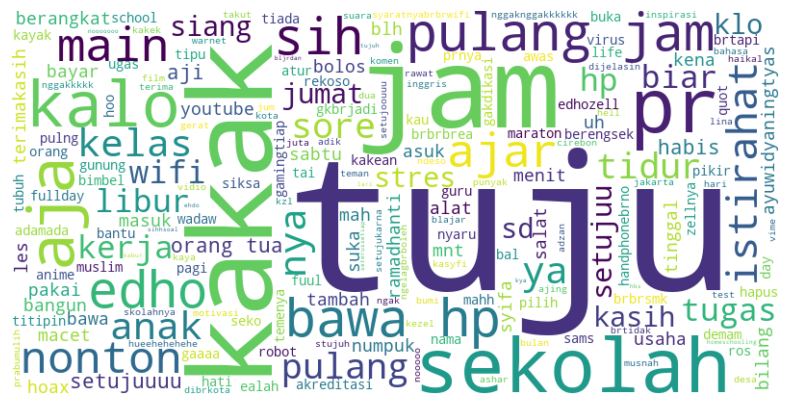

In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# Load the data
data = pd.read_excel('output/textblob.xlsx')
# Filter for neutral sentiment
neutral_data = data[data['score'] == 'netral']

# Combine all the text from the neutral sentiment rows
combined_text = ' '.join(neutral_data['text'].astype(str))
# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


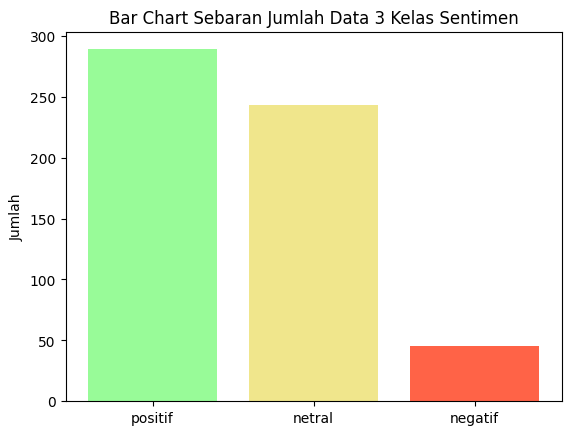

In [ ]:
x_axis = ['positif', 'netral', 'negatif']
y_axis = [(sum(df['score']=='positif')), (sum(df['score']=='netral')), (sum(df['score']=='negatif'))]
c = ['palegreen','khaki','tomato']
plt.bar(x_axis, y_axis, color = c)
plt.title('Bar Chart Sebaran Jumlah Data 3 Kelas Sentimen')
plt.ylabel('Jumlah')
plt.show()

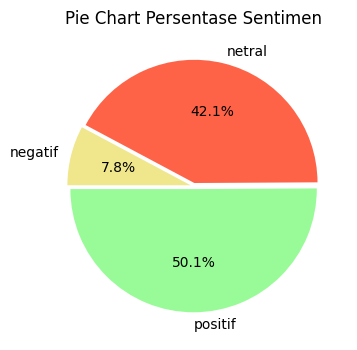

In [ ]:
#Membuat PieChart
plt.figure(figsize=(8,4))
plt.title("Pie Chart Persentase Sentimen", fontsize=12)
chart = plt.pie(df.score.value_counts(),explode=(0.025,0.025,0.025), 
            labels=df.score.value_counts().index, 
            colors=['palegreen','tomato','khaki'],  
            autopct='%1.1f%%', startangle=180)
plt.show()

df.to_excel("output/labeled.xlsx")

In [ ]:
from sklearn import svm
from sklearn.metrics import accuracy_score
# =========================================== EKSTRAKSI FITUR ===========================================
data = pd.read_excel('output/labeled.xlsx')
df=pd.DataFrame(data)
y=df.score.values
x=df.english.values

x_train, x_test, y_train, y_test = train_test_split(x, y, stratify = y, random_state=1,
                                    test_size=0.2, shuffle=True)

vectorizer = CountVectorizer(analyzer = 'word', ngram_range=(1,1), binary=True, stop_words='english')
vectorizer.fit (list(x_train) + list(x_test))

x_train_vec = vectorizer.transform(x_train)
x_test_vec = vectorizer.transform(x_test)
print(x_train_vec.shape)
print(x_test_vec.shape)

# Linear SVM Classifier
linear = svm.SVC(kernel='linear', C=1)
linear.fit(x_train_vec, y_train)
linear_pred = linear.predict(x_test_vec)
score_linear = accuracy_score(linear_pred, y_test)
print("Accuracy with Linear SVM: ", score_linear * 100, '%')

# RBF SVM Classifier
rbf = svm.SVC(kernel='rbf', gamma='scale', C=1)
rbf.fit(x_train_vec, y_train)
rbf_pred = rbf.predict(x_test_vec)
score_rbf = accuracy_score(rbf_pred, y_test)
print("Accuracy with RBF SVM: ", score_rbf * 100, '%')

# Polynomial SVM Classifier
poly = svm.SVC(kernel='poly', degree=3, C=1)
poly.fit(x_train_vec, y_train)
poly_pred = poly.predict(x_test_vec)
score_poly = accuracy_score(poly_pred, y_test)
print("Accuracy with Polynomial SVM: ", score_poly * 100, '%')

(461, 930)
(116, 930)
Accuracy with Linear SVM:  87.06896551724138 %
Accuracy with RBF SVM:  81.03448275862068 %
Accuracy with Polynomial SVM:  67.24137931034483 %


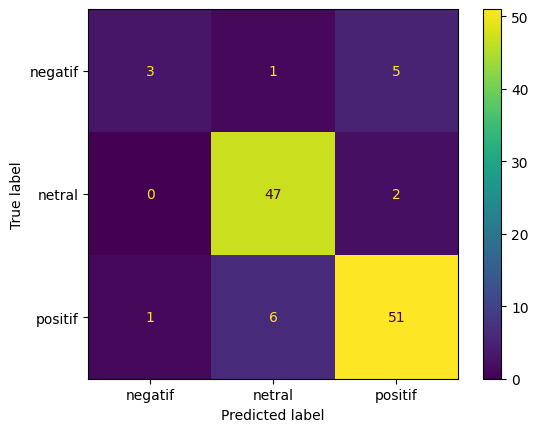

In [ ]:
cm = confusion_matrix(y_test, linear_pred, labels=linear.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=linear.classes_)
disp.plot()
plt.show()

In [ ]:
print("Linear SVM Confusion Matrix: ")
print(confusion_matrix(y_test, linear_pred))

Linear SVM Confusion Matrix: 
[[ 3  1  5]
 [ 0 47  2]
 [ 1  6 51]]


In [ ]:
print(classification_report(y_test, linear_pred))

              precision    recall  f1-score   support

     negatif       0.75      0.33      0.46         9
      netral       0.87      0.96      0.91        49
     positif       0.88      0.88      0.88        58

    accuracy                           0.87       116
   macro avg       0.83      0.72      0.75       116
weighted avg       0.87      0.87      0.86       116

